# Machine Learning

In [123]:
#  Use colab to access facebook prophet
# !pip install fbprophet

In [124]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
from fbprophet.plot import plot_cross_validation_metric 
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation

In [137]:
stem = pd.read_csv('stem_female.csv')
stem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,AFG,Female share of graduates in Information and C...,UIS.FGP.5T8.F600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Female share of graduates in Information and C...,UIS.FGP.5T8.F600,NaN,45.45455,NaN,NaN,67.85714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.09375,NaN,NaN,NaN,49.20728,46.77419,46.48218,43.70690
2,Algeria,DZA,Female share of graduates in Information and C...,UIS.FGP.5T8.F600,NaN,45.45455,NaN,NaN,67.85714,NaN,NaN,NaN,45.52284,NaN,47.20217,48.80532,47.97473,NaN,NaN,NaN,51.76786,54.27659,46.48218,48.93372
3,American Samoa,ASM,Female share of graduates in Information and C...,UIS.FGP.5T8.F600,NaN,45.45455,NaN,NaN,67.85714,NaN,NaN,NaN,45.52284,NaN,47.20217,48.80532,47.97473,NaN,NaN,NaN,51.76786,54.27659,46.48218,48.93372
4,Andorra,AND,Female share of graduates in Information and C...,UIS.FGP.5T8.F600,NaN,45.45455,NaN,30.0,23.52941,11.76471,13.63636,0.0,45.52284,10.0,47.20217,48.80532,47.97473,33.33333,NaN,NaN,51.76786,100.00000,100.00000,0.00000


In [180]:
stem = pd.read_csv('stem_female.csv')

stem = stem.drop(['Country Code', 'Indicator Name',
       'Indicator Code'], axis = 1)
stem_actors = ['Portugal ', 'Austria ', 'Estonia', 'Greece', 'France', 
              'Finland', 'Sweden', 'Germany', 'Canada', 'South Korea']
# transfer of knowledge 
# stem = stem[stem['Country Name'].isin(stem_actors)]
stem = stem[stem['Country Name'] == 'Canada']
stem.reset_index(inplace = True, drop = True)
stem.head()

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,61.33005,28.88889,17.07317,12.55061,51.21951,11.29666,46.9697,71.73913,10.43277,9.09894,45.00434,28.36879,9.65251,9.65909,17.30132,29.61472,29.62573,29.96837,38.46154,44.0


In [181]:
df = stem.melt(id_vars=['Country Name'],
                  var_name='Year',
                  value_name='Share')
df.head()

,Country Name,Year,Share
0,Canada,1999,61.33005
1,Canada,2000,28.88889
2,Canada,2001,17.07317
3,Canada,2002,12.55061
4,Canada,2003,51.21951


In [182]:
# df = pd.DataFrame()
df['ds'] = pd.to_datetime(df['Year'])
df['y'] = df['Share']
df.head()

,Country Name,Year,Share,ds,y
0,Canada,1999,61.33005,1999-01-01,61.33005
1,Canada,2000,28.88889,2000-01-01,28.88889
2,Canada,2001,17.07317,2001-01-01,17.07317
3,Canada,2002,12.55061,2002-01-01,12.55061
4,Canada,2003,51.21951,2003-01-01,51.21951


In [183]:
m = Prophet(weekly_seasonality=False, yearly_seasonality=True, changepoint_range=0.75, changepoint_prior_scale=0.55)
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


In [184]:
future = m.make_future_dataframe(periods=4, freq='Y')

In [185]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
19,2018-01-01,30.510635,9.852921,53.614726,-21.448767,-21.448767,-21.448767
20,2018-12-31,0.979200,-19.927657,20.929271,-21.432742,-21.457583,-21.402889
21,2019-12-31,-5.863745,-26.423441,15.560113,-21.416673,-21.500868,-21.315344
22,2020-12-31,13.804136,-6.883898,36.194656,-21.400559,-21.569111,-21.206510
23,2021-12-31,7.580917,-13.896613,28.802083,-21.384490,-21.650254,-21.070629


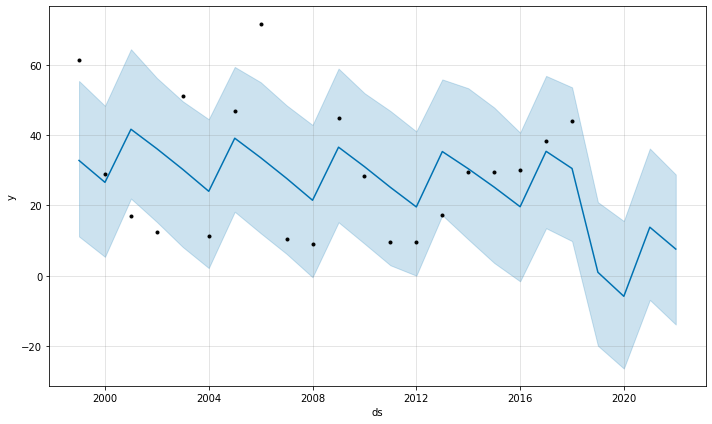

In [186]:
fig1 = m.plot(forecast)

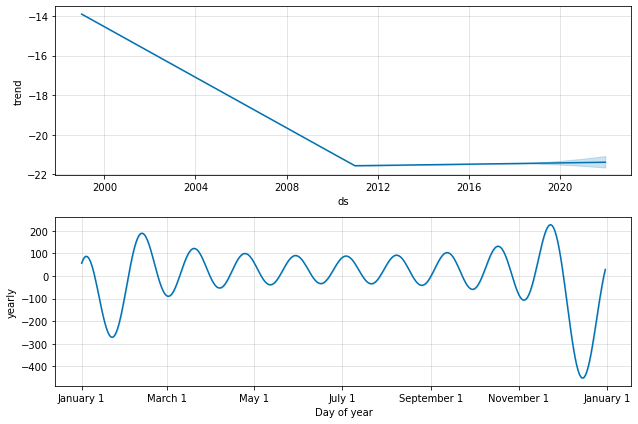

In [187]:
fig2 = m.plot_components(forecast)

Text(0.5, 1.0, 'Canada')

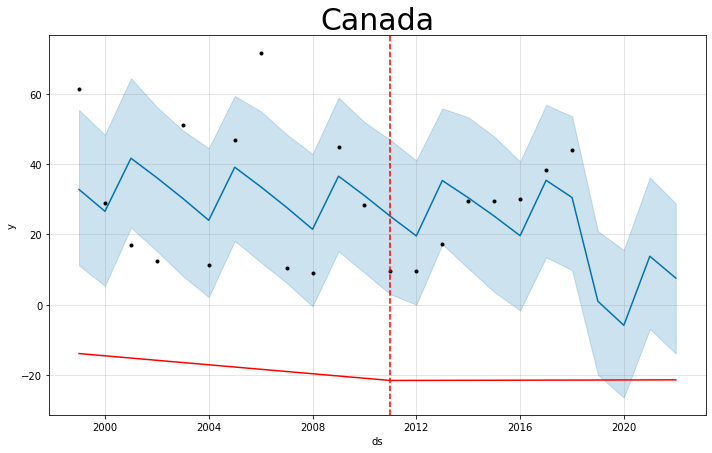

In [190]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)
plt.title('Canada', size = 30)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


    Country Name      1999      2000  ...      2016      2017      2018
157     Portugal  19.94885  31.43508  ...  23.45391  17.44422  75.56252

[1 rows x 21 columns]


INFO:fbprophet:Making 35 forecasts with cutoffs between 2000-03-31 00:00:00 and 2017-01-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbproph

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Making 35 forecasts with cutoffs between 2000-03-31 00:00:00 and 2017-01-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbproph

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Making 35 forecasts with cutoffs between 2000-03-31 00:00:00 and 2017-01-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbproph

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Making 35 forecasts with cutoffs between 2000-03-31 00:00:00 and 2017-01-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbproph

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:Making 35 forecasts with cutoffs between 2000-03-31 00:00:00 and 2017-01-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbproph

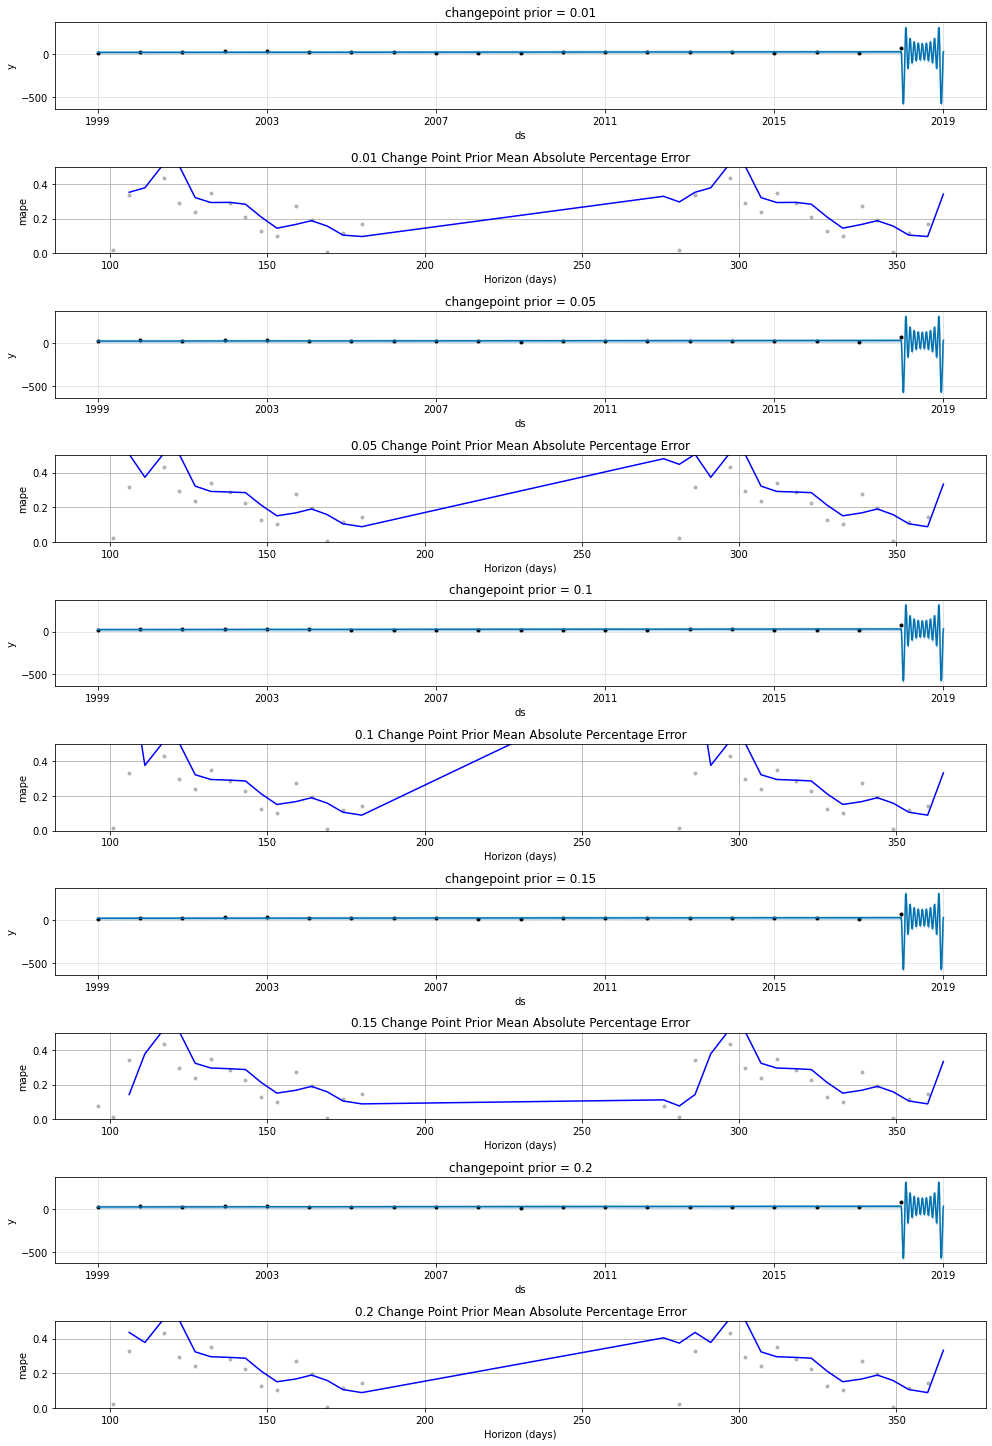

In [122]:
fig, ax = plt.subplots(10,1, figsize = (14, 20))
ax = ax.ravel()
j = 0
df = stem[stem['Country Name'] == 'Portugal']
print(df)
df.reset_index(inplace = True, drop = True)
df = df.melt(id_vars=['Country Name'],
                var_name='Year',
                value_name='Share')
for i in [0.01, 0.05, 0.10, 0.15, 0.20]:
    # df = RUT.reset_index()
    df = df.rename(columns = {'Year' : 'ds', 'Share' : 'y'} )
    m = Prophet(changepoint_prior_scale=i)
    #fit the prophet model on the data
    m.fit(df)
    # make a dataframe of the next two years 
    future = m.make_future_dataframe(periods=365)
    #predict on this future dataframe
    forecast = m.predict(future)
    # plot the forecast 
    fig = m.plot(forecast, ax = ax[j])
    ax[j].set_title('changepoint prior = ' + str(i))
    j += 1
    df_cv = cross_validation(m, initial='365 days', period='1 year', horizon = '365 days')
    df_p = performance_metrics(df_cv)
    fig = plot_cross_validation_metric(df_cv, metric='mape', ax = ax[j])
    ax[j].set_title(str(str(i) + ' Change Point Prior Mean Absolute Percentage Error'))
    ax[j].set_ylim(0,0.5)
    j += 1

In [116]:
stem = pd.read_csv('stem_female.csv')

stem = stem.drop(['Country Code', 'Indicator Name',
       'Indicator Code'], axis = 1)
stem_actors = ['Portugal ', 'Austria ', 'Estonia', 'Greece', 'France', 
              'Finland', 'Sweden', 'Germany', 'Canada', 'South Korea']

for actor in stem_actors:
  print(str(actor))
  actor = '' + actor
  df = stem[stem['Country Name'] is actor]
  print(df)
  df.reset_index(inplace = True, drop = True)
  df = df.melt(id_vars=['Country Name'],
                  var_name='Year',
                  value_name='Share')
  df['ds'] = pd.to_datetime(df['Year'])
  df['y'] = df['Share']
  m = Prophet(weekly_seasonality=False, yearly_seasonality=True)
  m.fit(df)
  forecast = m.predict(future)
  fig = m.plot(forecast)
  a = add_changepoints_to_plot(fig.gca(), m, forecast)

Portugal 


KeyError: ignored